In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits import mplot3d
import itertools as it
import sys
import progressbar

folder_scaling = "data_FS_measurement/"

In [2]:
!ls $folder_scaling

dat_N_10_p_0.100000_0.txt   dat_N_35_p_0.700000_25.txt
dat_N_10_p_0.100000_1.txt   dat_N_35_p_0.700000_26.txt
dat_N_10_p_0.100000_2.txt   dat_N_35_p_0.700000_27.txt
dat_N_10_p_0.100000_3.txt   dat_N_35_p_0.700000_28.txt
dat_N_10_p_0.100000_4.txt   dat_N_35_p_0.700000_29.txt
dat_N_10_p_0.100000_5.txt   dat_N_35_p_0.700000_3.txt
dat_N_10_p_0.100000_6.txt   dat_N_35_p_0.700000_30.txt
dat_N_10_p_0.100000_7.txt   dat_N_35_p_0.700000_31.txt
dat_N_10_p_0.100000_8.txt   dat_N_35_p_0.700000_32.txt
dat_N_10_p_0.100000_9.txt   dat_N_35_p_0.700000_33.txt
dat_N_10_p_0.200000_0.txt   dat_N_35_p_0.700000_34.txt
dat_N_10_p_0.200000_1.txt   dat_N_35_p_0.700000_4.txt
dat_N_10_p_0.200000_2.txt   dat_N_35_p_0.700000_5.txt
dat_N_10_p_0.200000_3.txt   dat_N_35_p_0.700000_6.txt
dat_N_10_p_0.200000_4.txt   dat_N_35_p_0.700000_7.txt
dat_N_10_p_0.200000_5.txt   dat_N_35_p_0.700000_8.txt
dat_N_10_p_0.200000_6.txt   dat_N_35_p_0.700000_9.txt
dat_N_10_p_0.200000_7.txt   dat_N_35_p_0.800000_0.txt
dat_N_10_p_0.20000

In [9]:
v_N = np.array([20,25,30,35,40,45,50])
v_p = np.array([0.3,0.4,0.5,0.6,0.7,0.8,0.9])

N_N = v_N.size
N_p = v_p.size

prefix = "dat"
suffix = ".txt"

In [10]:
data_list_scaled = []
err_list_scaled = []
num_list = []

# the loop with progress bar
bar = progressbar.ProgressBar(maxval=N_N*N_p, \
widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])

count = 0
bar.start()   

for i_N in range(N_N):
    N = v_N[i_N]
    dat_N = np.zeros((N_p,N+1,N+1))
    err_N = np.zeros((N_p,N+1,N+1))
    num_N = np.zeros((N_p,N))
    for i_p in range(N_p):
        p = v_p[i_p]
        for i in range(N):
            fn = folder_scaling + prefix + "_N_" + str(N) + "_p_" + "{:.6f}".format(p) + "_" + str(i) + suffix
            
            try:
                data = np.loadtxt(fn)
            except:
                data = -np.ones(2,N+1)
                print("file " + fn + " does not exist")
            
            num_N[i_p,i] = data.shape[0]

            dat_N[i_p,i+1,:] = np.mean(data,axis=0)
            err_N[i_p,i+1,:] = np.std(data,axis=0)/np.sqrt(num_N[i_p,i])
            
        count += 1
        bar.update(count)
        
    data_list_scaled.append(dat_N)
    err_list_scaled.append(err_N)

bar.finish()
    

[========================================================================] 100%


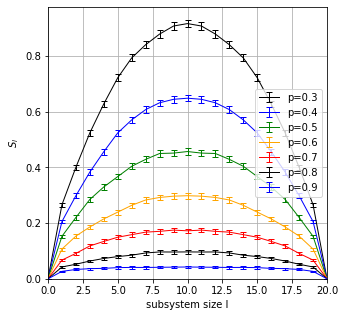

In [11]:
N_plot = 20
i_jump = 10

figsize = (5,5)
clr = ["black", "blue", "green", "orange","red","black", "blue", "green", "orange","red"]

plt.figure(figsize=figsize)

i_N = np.argmin(np.abs(v_N-N_plot))

x_axis = np.linspace(0,N_plot,N_plot+1)


for i_p in range(N_p):
    p = v_p[i_p]
    dat = data_list_scaled[i_N][i_p,i_jump,:]
    err = err_list_scaled[i_N][i_p,i_jump,:]
    dat = 0.5*(dat+np.flip(dat))
    err = 0.5*np.sqrt(err**2+np.flip(err)**2)

    label = "p="+str(p)
    
    #_ = plt.errorbar(x_axis,0.5*(dat+np.flip(dat)), yerr=err_S[i_L,i_jump,:], linewidth = 1, color = 'black')
    _ = plt.errorbar(x_axis,dat , yerr=err, linewidth = 1, capsize=3, color=clr[i_p], label=label)
    #_ = plt.plot(x_axis,dat, linewidth = 1, color='blue')

plt.xlim(0,N_plot)
plt.ylim(bottom=0.)
plt.grid(True)

plt.xlabel("subsystem size l")
plt.ylabel(r"$S_l$")
plt.legend(loc="right")
#plt.title("N="+str(N_plot))

#plt.savefig("figs_paper/St_" + str(N_plot) + "_" + str(i_jump) + "_scaled.pdf", bbox_inches='tight')

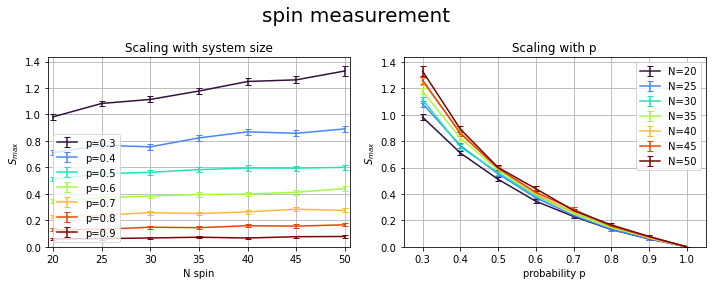

In [18]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
plt.style.use('default')

p_plot = v_p
N_plot = v_N

p_min = np.min(p_plot)
p_max = np.max(p_plot)
N_min = np.min(N_plot)
N_max = np.max(N_plot)


cmap = matplotlib.cm.turbo

# first panel
plt.suptitle("spin measurement", fontsize=20)

x_axis = v_N
for p in p_plot:  
    i_p = np.argmin(np.abs(v_p-p))
    
    dat_plot = []
    dat_err = []
    
    for i_N in range(N_N):
        N = v_N[i_N]

        ind = np.unravel_index(np.argmax(data_list_scaled[i_N][i_p], axis=None), data_list_scaled[i_N][i_p].shape)
        dat_plot.append(data_list_scaled[i_N][i_p][ind])
        dat_err.append(err_list_scaled[i_N][i_p][ind])

        
    _ = ax[0].errorbar(v_N,dat_plot, yerr=dat_err, capsize=3, 
                       color=cmap((p-p_min)/(p_max-p_min)), label="p="+str(p))


ax[0].set_ylim(bottom=0.)
ax[0].set_xlim(np.min(x_axis)-0.5, np.max(x_axis)+0.5)
ax[0].grid(True)

ax[0].set_xticks(v_N)

ax[0].set_xlabel("N spin")
ax[0].set_ylabel(r"$S_{max}$")
ax[0].legend(loc="lower left")
ax[0].set_title("Scaling with system size")

# second panel

x_axis = np.append(v_p,1.)

for N in N_plot:
    i_N = np.argmin(np.abs(v_N-N))
    
    dat_plot = []
    dat_err = []
    
    for i_p in range(N_p):
        N = v_N[i_N]

        ind = np.unravel_index(np.argmax(data_list_scaled[i_N][i_p], axis=None), data_list_scaled[i_N][i_p].shape)
        dat_plot.append(data_list_scaled[i_N][i_p][ind])
        dat_err.append(err_list_scaled[i_N][i_p][ind])
        
    _ = ax[1].errorbar(x_axis,np.append(dat_plot,0.), yerr=np.append(dat_err,0.), capsize=3, 
                       color=cmap((N-N_min)/(N_max-N_min)), label="N="+str(N))


ax[1].set_ylim(bottom=0.)
ax[1].set_xlim(np.min(x_axis)-0.05, np.max(x_axis)+0.05)
ax[1].grid(True)

ax[1].set_xticks(x_axis)

ax[1].set_xlabel("probability p")
ax[1].set_ylabel(r"$S_{max}$")
ax[1].legend()
ax[1].set_title("Scaling with p")

fig.tight_layout()



plt.savefig("scaling_measurement.pdf", bbox_inches='tight')